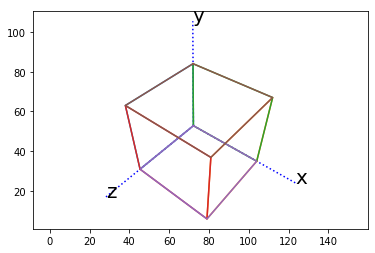

In [7]:
#Question 1
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy.linalg import null_space

# 8 points of a cube in 3D space.
points = np.array([[0, 0, 0, 0, 1, 1, 1, 1],
                   [0, 0, 1, 1, 0, 0, 1, 1],
                   [0, 1, 0, 1, 0, 1, 0, 1], 
                   [1, 1, 1, 1, 1, 1, 1, 1]])

# 7 points of a cube in the image space.  Ignore the (0,0,0) point, because we cannot see it in the image.
img = np.array([[46, 72, 38, 104, 79, 112, 83],
                [69, 16, 37,  65, 94,  33, 65]])

# draw the cube for verification
def plotcube(pt, P):
    """plot a cube described by pt. 
       T is the transition matrix that maps objects from a 3D space to a 2D screen.
       The camera is at [1/2, 1/2, sqrt(2)/2]"""
        
    def drawAxis():
        """ draw the axes of the 3D space"""
        X = np.dot(P, [[0, 1.5],[0, 0],[0, 0], [1, 1]])
        Y = np.dot(P, [[0, 0],[0, 1.5],[0, 0], [1, 1]])
        Z = np.dot(P, [[0, 0],[0, 0],[0, 1.5], [1, 1]])
        
        np.divide(X[0:2, 0:2], X[2, 0:2], X[0:2, 0:2])
        np.divide(Y[0:2, 0:2], Y[2, 0:2], Y[0:2, 0:2])
        np.divide(Z[0:2, 0:2], Z[2, 0:2], Z[0:2, 0:2])
        
        plt.plot(X[0,0:2], 100-X[1,0:2], 'b:')
        plt.plot(Y[0,:], 100-Y[1,:], 'b:')
        plt.plot(Z[0,:], 100-Z[1,:], 'b:')
        plt.text(X[0,1], 100-X[1,1], r'x', fontsize=20)
        plt.text(Y[0,1], 100-Y[1,1], r'y', fontsize=20)
        plt.text(Z[0,1]-0.1, 100-Z[1,1], r'z', fontsize=20)

        
    def mapRectangle(p1, p2, p3, p4):
        """return two 1D arrays: X list and Y list from
           points[:, p1], points[:,p2], points[:, p3], points[:, p4]"""
        A = np.dot(P, points[:, [p1, p2, p3, p4, p1]])
        np.divide(A[0:2, :], A[2, :], A[0:2, :])
        return A[0,:], 100-A[1,:]
        
    drawAxis()
    
    # plot face 1
    X1, Y1 = mapRectangle(0, 1, 3, 2)
    plt.plot(X1, Y1)

    # plot face 2
    X2, Y2 = mapRectangle(4, 6, 7, 5)
    plt.plot(X2, Y2)

    # plot face 3
    X3, Y3 = mapRectangle(0, 2, 6, 4)
    plt.plot(X3, Y3)

    # plot face 4
    X4, Y4 = mapRectangle(1, 5, 7, 3)
    plt.plot(X4, Y4)

    # plot face 5
    X5, Y5 = mapRectangle(0, 4, 5, 1)
    plt.plot(X5, Y5)

    # plot face 6
    X6, Y6 = mapRectangle(2, 3, 7, 6)
    plt.plot(X6, Y6)

    plt.axis('equal')
    
    plt.show()

A = np.zeros([14, 11])
b = np.zeros([14, 1])
for i in range(7):
    j = 2*i
    A[j, 0:4] = points[:, i+1].T
    A[j, 8:11] = -1.0*img[0, i]*points[0:3, i+1].T 
    A[j+1, 4:8] = points[:, i+1].T
    A[j+1, 8:11] = -1.0*img[1, i]*points[0:3, i+1].T
    b[j] = img[0, i]
    b[j+1] = img[1, i]
    
#print(A)

# we select the 2nd to 12th to solve the linear system
A1 = A[1:12, :]
b1 = b[1:12]
x = np.linalg.solve(A1, b1)
x = np.append(x, 1)
P = np.reshape(x, (3, 4))

plotcube(points, P)

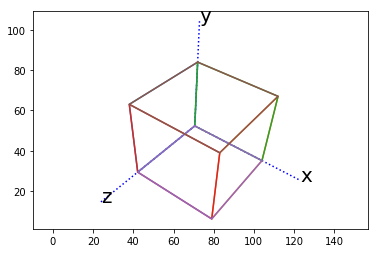

In [8]:
# we select the 3rd to 13th eq. to solve the linear system
A1 = A[2:13, :]
b1 = b[2:13]
x = np.linalg.solve(A1, b1)
x = np.append(x, 1)
P = np.reshape(x, (3, 4))

plotcube(points, P)

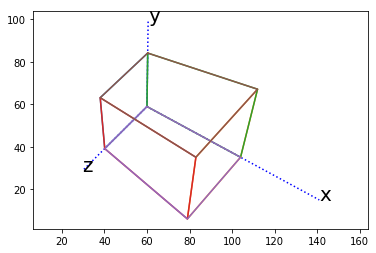

In [9]:
# we select the 4th to 14th eq. to solve the linear system
A1 = A[3: , :]
b1 = b[3: ]
x = np.linalg.solve(A1, b1)
x = np.append(x, 1)
P = np.reshape(x, (3, 4))

plotcube(points, P)

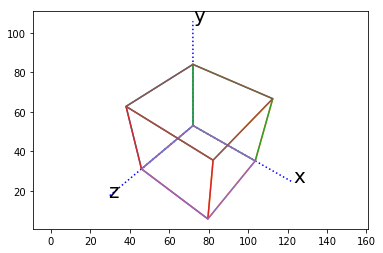

In [11]:
#Question 2
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy.linalg import null_space
# 8 points of a cube in 3D space.
points = np.array([[0, 0, 0, 0, 1, 1, 1, 1],
                   [0, 0, 1, 1, 0, 0, 1, 1],
                   [0, 1, 0, 1, 0, 1, 0, 1], 
                   [1, 1, 1, 1, 1, 1, 1, 1]])

# 7 points of a cube in the image space.  Ignore the (0,0,0) point, because we cannot see it in the image.
img = np.array([[46, 72, 38, 104, 79, 112, 83],
                [69, 16, 37,  65, 94,  33, 65]])

# draw the cube for verification
def plotcube(pt, P):
    """plot a cube described by pt. 
       T is the transition matrix that maps objects from a 3D space to a 2D screen.
       The camera is at [1/2, 1/2, sqrt(2)/2]"""
        
    def drawAxis():
        """ draw the axes of the 3D space"""
        X = np.dot(P, [[0, 1.5],[0, 0],[0, 0], [1, 1]])
        Y = np.dot(P, [[0, 0],[0, 1.5],[0, 0], [1, 1]])
        Z = np.dot(P, [[0, 0],[0, 0],[0, 1.5], [1, 1]])
        
        np.divide(X[0:2, 0:2], X[2, 0:2], X[0:2, 0:2])
        np.divide(Y[0:2, 0:2], Y[2, 0:2], Y[0:2, 0:2])
        np.divide(Z[0:2, 0:2], Z[2, 0:2], Z[0:2, 0:2])
        
        plt.plot(X[0,0:2], 100-X[1,0:2], 'b:')
        plt.plot(Y[0,:], 100-Y[1,:], 'b:')
        plt.plot(Z[0,:], 100-Z[1,:], 'b:')
        plt.text(X[0,1], 100-X[1,1], r'x', fontsize=20)
        plt.text(Y[0,1], 100-Y[1,1], r'y', fontsize=20)
        plt.text(Z[0,1]-0.1, 100-Z[1,1], r'z', fontsize=20)

        
    def mapRectangle(p1, p2, p3, p4):
        """return two 1D arrays: X list and Y list from
           points[:, p1], points[:,p2], points[:, p3], points[:, p4]"""
        A = np.dot(P, points[:, [p1, p2, p3, p4, p1]])
        np.divide(A[0:2, :], A[2, :], A[0:2, :])
        return A[0,:], 100-A[1,:]
        
    drawAxis()
    
    # plot face 1
    X1, Y1 = mapRectangle(0, 1, 3, 2)
    plt.plot(X1, Y1)

    # plot face 2
    X2, Y2 = mapRectangle(4, 6, 7, 5)
    plt.plot(X2, Y2)

    # plot face 3
    X3, Y3 = mapRectangle(0, 2, 6, 4)
    plt.plot(X3, Y3)

    # plot face 4
    X4, Y4 = mapRectangle(1, 5, 7, 3)
    plt.plot(X4, Y4)

    # plot face 5
    X5, Y5 = mapRectangle(0, 4, 5, 1)
    plt.plot(X5, Y5)

    # plot face 6
    X6, Y6 = mapRectangle(2, 3, 7, 6)
    plt.plot(X6, Y6)

    plt.axis('equal')
    
    plt.show()

A = np.zeros([14, 11])
b = np.zeros([14, 1])
for i in range(7):
    j = 2*i
    A[j, 0:4] = points[:, i+1].T
    A[j, 8:11] = -1.0*img[0, i]*points[0:3, i+1].T 
    A[j+1, 4:8] = points[:, i+1].T
    A[j+1, 8:11] = -1.0*img[1, i]*points[0:3, i+1].T
    b[j] = img[0, i]
    b[j+1] = img[1, i]

# using A and B rightaway to solve the overdetermined system
x, residuals, rank, s = np.linalg.lstsq(A, b, rcond = None)
x = np.append(x, 1)
P = np.reshape(x, (3, 4))

plotcube(points, P)

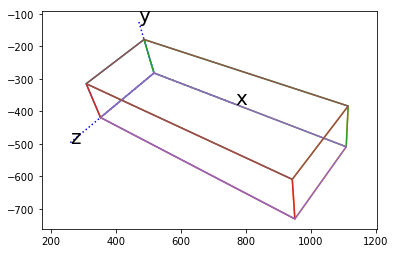

In [12]:
#Question 3
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy.linalg import null_space
# 8 points of a cube in 3D space.
points = np.array([[0, 0, 0, 0, 3, 3, 3, 3],
                   [0, 0, 1, 1, 0, 0, 1, 1],
                   [0, 1, 0, 1, 0, 1, 0, 1], 
                   [1, 1, 1, 1, 1, 1, 1, 1]])

# 7 points of a cube in the image space.  Ignore the (0,0,0) point, because we cannot see it in the image.
img = np.array([[353, 487, 309, 1109, 951, 1115, 947],
                [519, 279, 415,  609, 831,  491, 715]])

# draw the cube for verification
def plotcube(pt, P):
    """plot a cube described by pt. 
       T is the transition matrix that maps objects from a 3D space to a 2D screen.
       The camera is at [1/2, 1/2, sqrt(2)/2]"""
        
    def drawAxis():
        """ draw the axes of the 3D space"""
        X = np.dot(P, [[0, 1.5],[0, 0],[0, 0], [1, 1]])
        Y = np.dot(P, [[0, 0],[0, 1.5],[0, 0], [1, 1]])
        Z = np.dot(P, [[0, 0],[0, 0],[0, 1.5], [1, 1]])
        
        np.divide(X[0:2, 0:2], X[2, 0:2], X[0:2, 0:2])
        np.divide(Y[0:2, 0:2], Y[2, 0:2], Y[0:2, 0:2])
        np.divide(Z[0:2, 0:2], Z[2, 0:2], Z[0:2, 0:2])
        
        plt.plot(X[0,0:2], 100-X[1,0:2], 'b:')
        plt.plot(Y[0,:], 100-Y[1,:], 'b:')
        plt.plot(Z[0,:], 100-Z[1,:], 'b:')
        plt.text(X[0,1], 100-X[1,1], r'x', fontsize=20)
        plt.text(Y[0,1], 100-Y[1,1], r'y', fontsize=20)
        plt.text(Z[0,1]-0.1, 100-Z[1,1], r'z', fontsize=20)

        
    def mapRectangle(p1, p2, p3, p4):
        """return two 1D arrays: X list and Y list from
           points[:, p1], points[:,p2], points[:, p3], points[:, p4]"""
        A = np.dot(P, points[:, [p1, p2, p3, p4, p1]])
        np.divide(A[0:2, :], A[2, :], A[0:2, :])
        return A[0,:], 100-A[1,:]
        
    drawAxis()
    
    # plot face 1
    X1, Y1 = mapRectangle(0, 1, 3, 2)
    plt.plot(X1, Y1)

    # plot face 2
    X2, Y2 = mapRectangle(4, 6, 7, 5)
    plt.plot(X2, Y2)

    # plot face 3
    X3, Y3 = mapRectangle(0, 2, 6, 4)
    plt.plot(X3, Y3)

    # plot face 4
    X4, Y4 = mapRectangle(1, 5, 7, 3)
    plt.plot(X4, Y4)

    # plot face 5
    X5, Y5 = mapRectangle(0, 4, 5, 1)
    plt.plot(X5, Y5)

    # plot face 6
    X6, Y6 = mapRectangle(2, 3, 7, 6)
    plt.plot(X6, Y6)

    plt.axis('equal')
    
    plt.show()

A = np.zeros([14, 11])
b = np.zeros([14, 1])
for i in range(7):
    j = 2*i
    A[j, 0:4] = points[:, i+1].T
    A[j, 8:11] = -1.0*img[0, i]*points[0:3, i+1].T 
    A[j+1, 4:8] = points[:, i+1].T
    A[j+1, 8:11] = -1.0*img[1, i]*points[0:3, i+1].T
    b[j] = img[0, i]
    b[j+1] = img[1, i]

# we select the first 11 equations to solve the linear system
A1 = A[0:11, :]
b1 = b[0:11]
x = np.linalg.solve(A1, b1)
x = np.append(x, 1)
P = np.reshape(x, (3, 4))

plotcube(points, P)

In [7]:
#Question 5
#Source: https://www.geeksforgeeks.org/displaying-the-coordinates-of-the-points-clicked-on-the-image-using-python-opencv/

import cv2

def click (event, x, y, flags, p):
    if event == cv2.EVENT_LBUTTONDOWN : #only check for left mouse click
        cv2.circle(image,(x,y), 5, (0, 255, 0), -1)
        print('(x,y): ({0},{1})'.format(x,y))
        
        # displaying the coordinates
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image, str(x) + ',' + str(y), (x,y), font, 1, (255, 0, 0), 2)
        cv2.imshow('Camera Calibration', image)
        
    if event == cv2.EVENT_RBUTTONDOWN: #only check for right mouse click
        cv2.circle(image,(x,y), 5, (0, 255, 0), -1)
        print('(x,y): ({0},{1})'.format(x,y))
        
        # displaying the coordinates
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image, str(x) + ',' + str(y), (x,y), font, 1, (255, 0, 0), 2)
        cv2.imshow('Camera Calibration', image)
        
#driver body
image = cv2.imread('cube.jpg') #load model (using cube.jpg)
cv2.imshow('Camera Calibration', image) #display model on another window
cv2.setMouseCallback('Camera Calibration', click) #set mouse and call click function
cv2.waitKey(0) #press any key to exit
cv2.destroyAllWindows() # close the window

(x,y): (726,166)
(x,y): (586,254)
(x,y): (897,237)
(x,y): (1109,326)
